In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
img = image.load_img(r'C:\Users\Asus\P2datasetFull\train\Fail\train2 (94).jpg')

In [4]:
plt.imshow(img)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory(r'C:\Users\Asus\P2datasetFull\train',
                                      target_size=(256,256),
                                      batch_size=3,
                                      class_mode='binary')
validation_dataset = validation.flow_from_directory(r'C:\Users\Asus\P2datasetFull\val1',
                                      target_size=(256,256),
                                      batch_size=3,
                                      class_mode='binary')

Found 29740 images belonging to 2 classes.
Found 12438 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Fail': 0, 'Pass': 1}

In [25]:
model = tf.keras.models.Sequential([    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (256,256,3)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #\n",
                                        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.3),
                                        #\n",
                                        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2), 
                                        ##\n"
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dropout(0.3),
                                        ##\n",
                                        tf.keras.layers.Dense(512,activation='relu'),
                                        ##\n",
                                        tf.keras.layers.Dense(1,activation='sigmoid')
                                        ])

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
              metrics=['accuracy']
             )

In [27]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=2)

In [28]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=1000,
                    epochs=20,
                    validation_data=validation_dataset,
                    callbacks=[early_stop]
                   )

Epoch 1/20
1000/1000 [==============================] - 687s 687ms/step - loss: 0.6798 - accuracy: 0.6667 - val_loss: 0.5696 - val_accuracy: 0.7348
Epoch 2/20
1000/1000 [==============================] - 680s 680ms/step - loss: 0.5349 - accuracy: 0.7283 - val_loss: 0.5233 - val_accuracy: 0.7441
Epoch 3/20
1000/1000 [==============================] - 711s 711ms/step - loss: 0.4772 - accuracy: 0.7787 - val_loss: 0.4686 - val_accuracy: 0.7955
Epoch 4/20
1000/1000 [==============================] - 686s 686ms/step - loss: 0.4290 - accuracy: 0.8123 - val_loss: 0.4250 - val_accuracy: 0.7980
Epoch 5/20
1000/1000 [==============================] - 678s 678ms/step - loss: 0.4149 - accuracy: 0.8173 - val_loss: 0.4746 - val_accuracy: 0.7673
Epoch 6/20
1000/1000 [==============================] - 670s 670ms/step - loss: 0.3969 - accuracy: 0.8217 - val_loss: 0.4229 - val_accuracy: 0.8048
Epoch 7/20
1000/1000 [==============================] - 679s 679ms/step - loss: 0.3690 - accuracy: 0.8393 - val_

In [6]:
# model.save('MLModel(83% wala).h5')
model = load_model('MLModel(82%).h5')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()


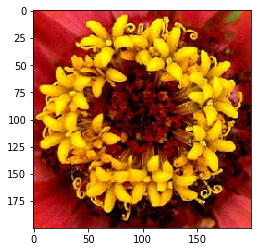

1/1 [==============================] - 0s 73ms/step
NOT Nude


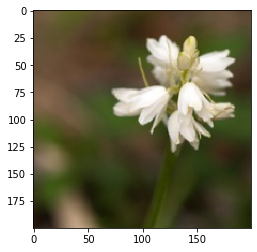

1/1 [==============================] - 0s 28ms/step
NOT Nude


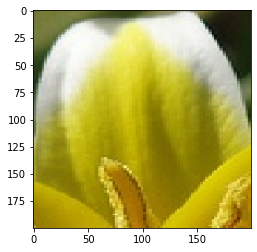

1/1 [==============================] - 0s 32ms/step
Nude


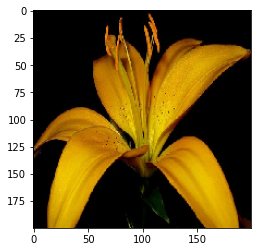

1/1 [==============================] - 0s 32ms/step
NOT Nude


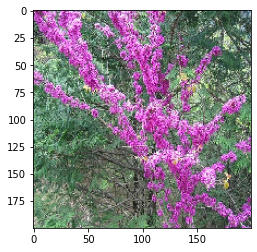

1/1 [==============================] - 0s 32ms/step
NOT Nude


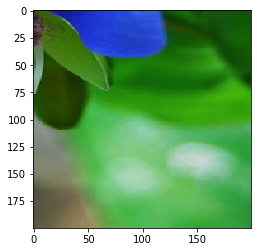

1/1 [==============================] - 0s 28ms/step
NOT Nude


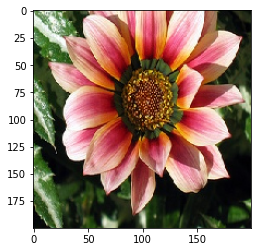

1/1 [==============================] - 0s 24ms/step
NOT Nude


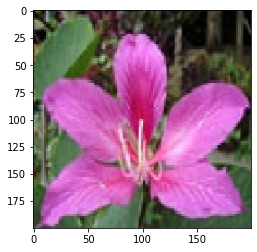

1/1 [==============================] - 0s 24ms/step
NOT Nude


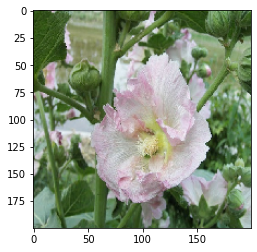

1/1 [==============================] - 0s 28ms/step
NOT Nude


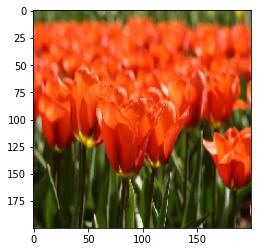

1/1 [==============================] - 0s 24ms/step
NOT Nude


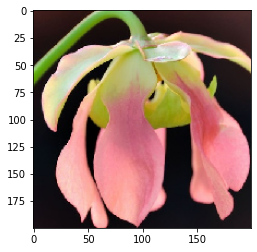

1/1 [==============================] - 0s 24ms/step
NOT Nude


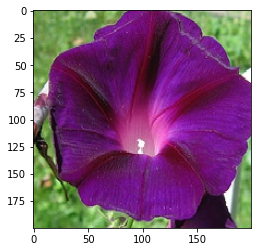

1/1 [==============================] - 0s 22ms/step
NOT Nude


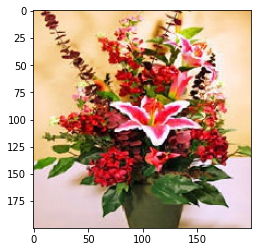

1/1 [==============================] - 0s 24ms/step
NOT Nude


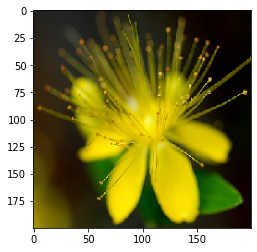

1/1 [==============================] - 0s 28ms/step
NOT Nude


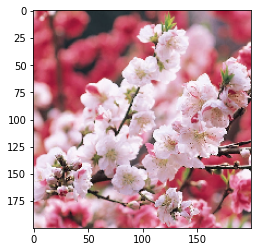

1/1 [==============================] - 0s 32ms/step
NOT Nude


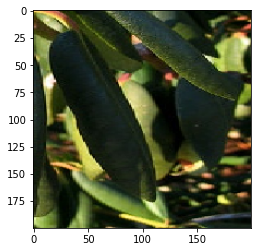

1/1 [==============================] - 0s 32ms/step
NOT Nude


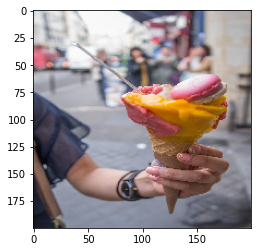

1/1 [==============================] - 0s 28ms/step
NOT Nude


In [14]:
dir_path = r'F:\Testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val =(model.predict(images) > 0.5)*1 
    if val==1:
        print("NOT Nude")
    else:
        print("Nude")